# Training Models

In [1]:
# Importing necessary libraries
# We import numpy, matplotlib.pyplot, and matplotlib libraries to handle numerical operations, create plots, and set plot styles, respectively.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Setting seaborn plot style
# Here, we use the sns.set() function to set the default plot style to "darkgrid" from the seaborn library.
# The "darkgrid" style adds a dark background grid to all plots created using seaborn.
import seaborn as sns
sns.set(style="darkgrid")

### Training a Linear Regression Model

__Linear Regression Model__ is a simple and commonly used machine learning algorithm used for predicting numeric values. It finds the best-fitting straight line through the data points in a dataset. This line represents the relationship between the input features (independent variables) and the target variable (dependent variable). The model calculates the intercept and slope of the line to make predictions for new data points. The main goal is to minimize the difference between the predicted values and the actual values in the training data. Linear regression is often used for tasks like predicting house prices, sales, or any other numeric outcome based on input features.

In [2]:
# Generating random data points
# Here, we create two NumPy arrays, x and y, to store the random data points.
# The x array contains 100 random values between 0 and 2, generated using np.random.rand() function.
# The y array is created by adding random noise to the equation y = 4 + 3x + ε, where ε is random noise generated using np.random.randn() function.
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

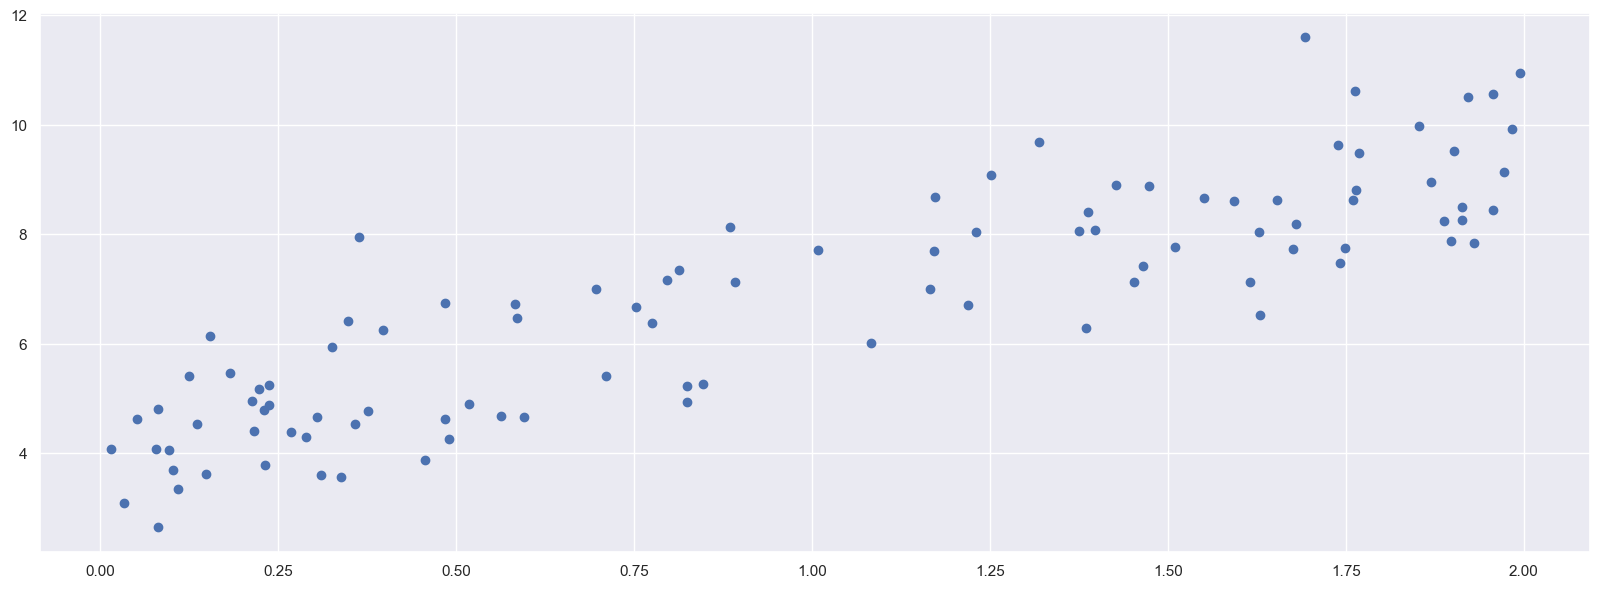

In [3]:
# Setting plot size
# We use plt.subplots() function to create a figure and axis (ax) objects for the plot.
# The figsize parameter is set to (20, 7) to adjust the size of the plot to 20 inches in width and 7 inches in height.
# This helps to improve the visibility and clarity of the scatter plot.
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

In [4]:
# Adding a column of ones to the input 'x' to account for the bias term in linear regression
x_b = np.c_[np.ones((100, 1)), x]
# Calculating the optimal theta values using the normal equation
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
# The calculated 'theta' array contains the intercept (bias) term in theta[0]
# and the slope (weight) of the linear regression in theta[1].
theta

array([[4.07780665],
       [2.72613309]])

In [6]:
# Predicting the output 'y' (y_hat) based on the calculated theta values
y_hat = theta[0] + x * theta[1]

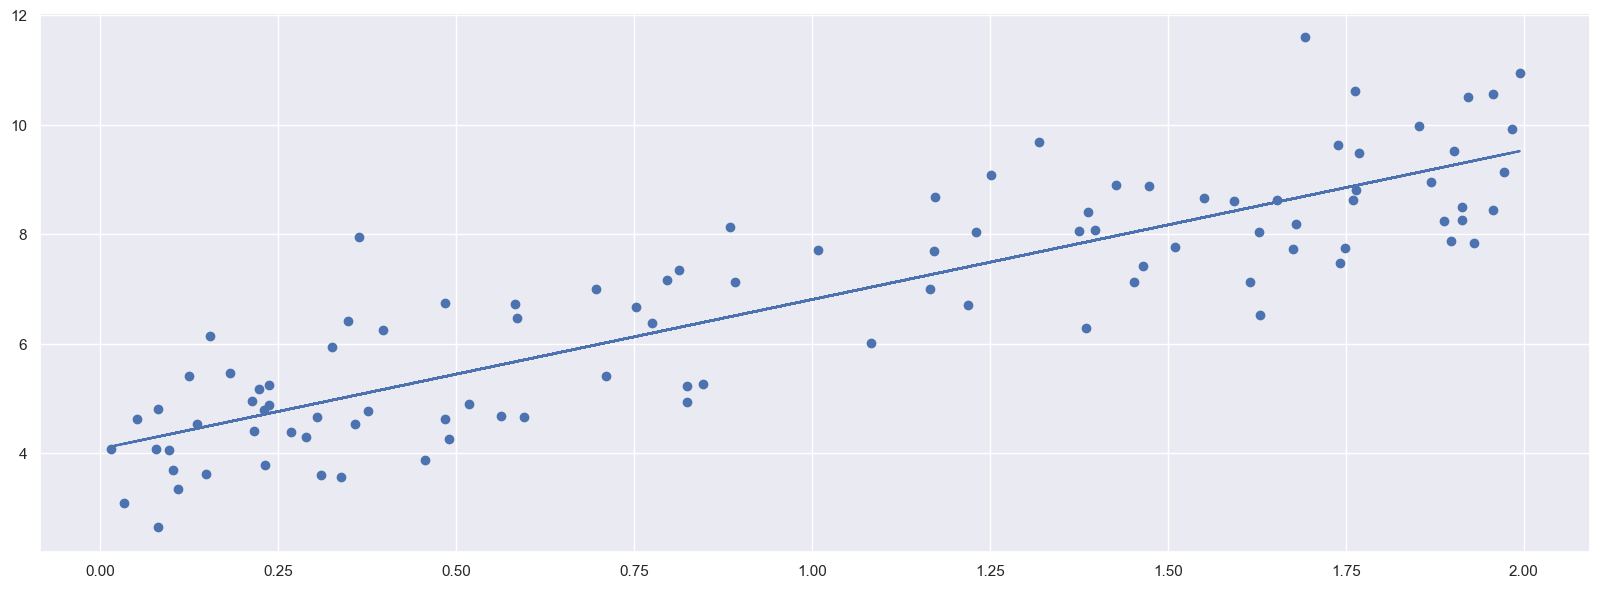

In [7]:
# Creating a plot to visualize the linear regression line and the original data points
# Creating a new figure and axis with a specific size for the plot
fig, ax = plt.subplots(figsize=(20, 7))
# Plotting the predicted line (y_hat) based on the calculated theta values
plt.plot(x, y_hat)
# Scatter plotting the original data points (x vs y)
plt.scatter(x, y)

### Linear Regression in Sklearn

In [8]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression

# Creating a LinearRegression object
lin_reg = LinearRegression()

# Fitting the linear regression model to the data (x, y)
lin_reg.fit(x, y)

# Obtaining the intercept and coefficients of the fitted model
lin_reg.intercept_, lin_reg.coef_

(array([4.07780665]), array([[2.72613309]]))

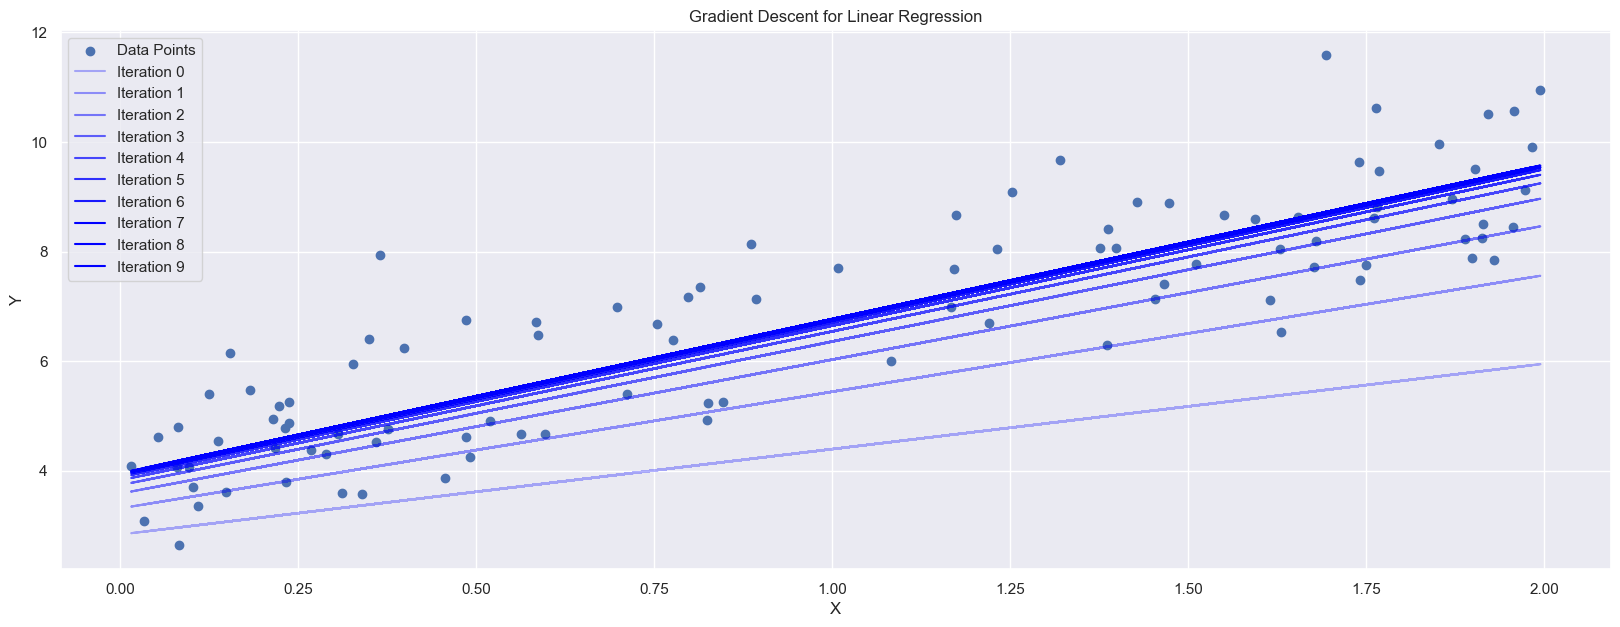

In [11]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Setting the learning rate, number of iterations, and data size
learning_rate = 0.1
n_iterations = 10
m = 100

# Random initialization of theta parameters for gradient descent
theta = np.random.randn(2, 1)

# Setting up the plot for visualization
fig, ax = plt.subplots(figsize=(20, 7))

# Plotting the data points (x, y)
plt.scatter(x, y, label='Data Points')

# Gradient Descent iterations for linear regression optimization
for iteration in range(n_iterations):
    # Adding a bias term to the input data (x) to incorporate the intercept (theta[0])
    x_b = np.c_[np.ones((m, 1)), x]

    # Computing gradients using the mean squared error derivative formula
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)

    # Updating the theta parameters using gradient descent
    theta -= learning_rate * gradients

    # Visualizing the regression line at specific intervals during iterations
    if iteration % 1 == 0:
        # Computing the predicted y values based on the updated theta
        y_hat = x_b.dot(theta)

        # Plotting the regression line on the same graph with varying transparency
        alpha_val = min(1.0, 0.3 + iteration / n_iterations)  # Ensuring alpha stays within [0, 1]
        ax.plot(x, y_hat, label=f'Iteration {iteration}', alpha=alpha_val, color="blue")

# Adding labels and legend to the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Gradient Descent for Linear Regression')
ax.legend()

# Displaying the plot
plt.show()


## Batch Gradient Descent

__Batch Gradient Descent__ is an optimization algorithm used in machine learning to find the best parameters for a model. It is specifically used for training models like linear regression and neural networks. In Batch Gradient Descent, the algorithm processes the entire training dataset to compute the gradients of the model's parameters with respect to the loss function. These gradients indicate the direction in which the parameters should be updated to minimize the loss. After computing the gradients for the whole dataset, the algorithm makes a single update to the parameters. This process is repeated iteratively until the model converges to its optimal state, where the loss is minimized and the model is trained to make accurate predictions. Batch Gradient Descent is straightforward but can be computationally expensive for large datasets.

In [12]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # Random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

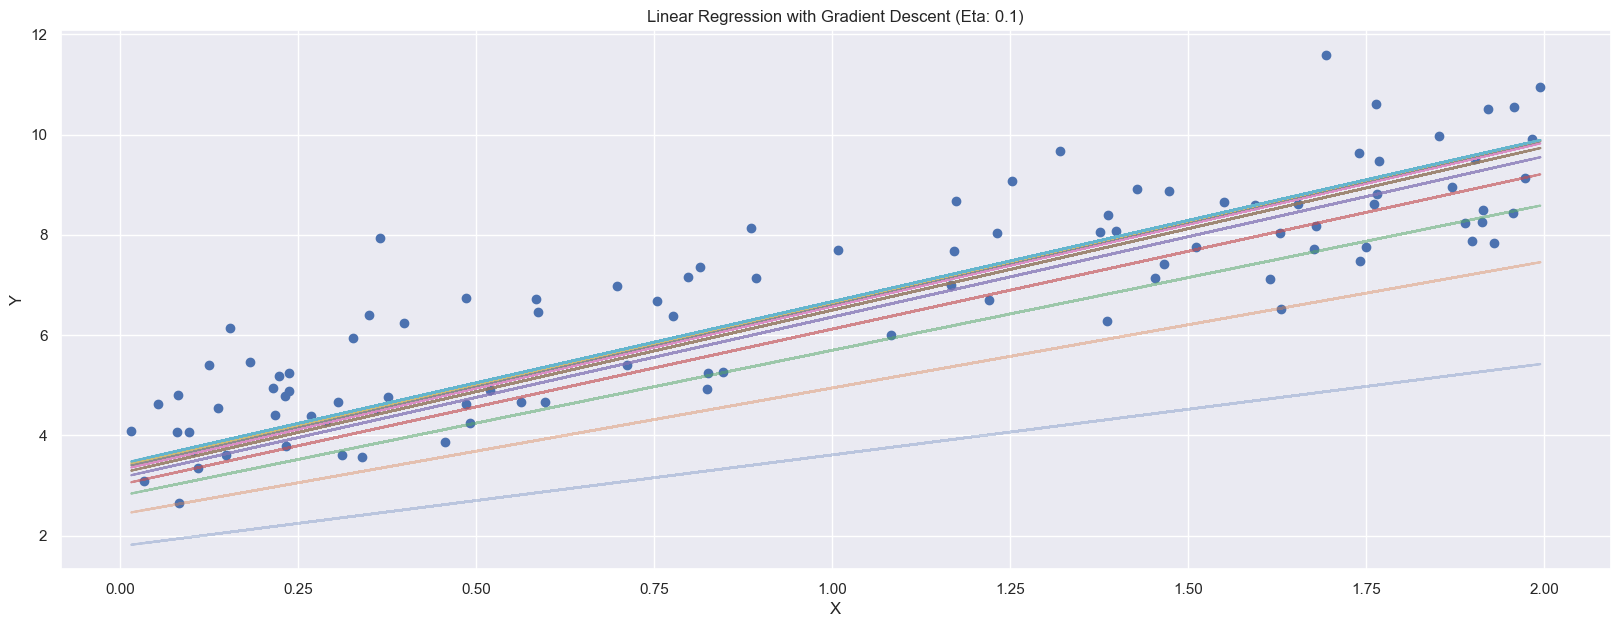

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are already defined as the input features and target variable

eta = 0.1  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)  # Random initialization

# Adding a bias term (x_0 = 1) to the input data (x) for the intercept term (theta[0])
x_b = np.c_[np.ones((m, 1)), x]

# Setting up the plot for visualization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    # Computing gradients using the mean squared error derivative formula
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    # Updating the theta parameters using gradient descent
    theta -= eta * gradients

    if iteration % 1 == 0:
        y_hat = x_b.dot(theta)
        # Normalize the iteration value to be between 0 and 1
        alpha_val = min(1.0, 0.3 + iteration / (n_iterations - 1))
        ax.plot(x, y_hat, alpha=alpha_val)

# Adding a title to the plot with the learning rate information
ax.set_title(f"Linear Regression with Gradient Descent (Eta: {eta})")

# Adding labels to the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Displaying the plot
plt.show()


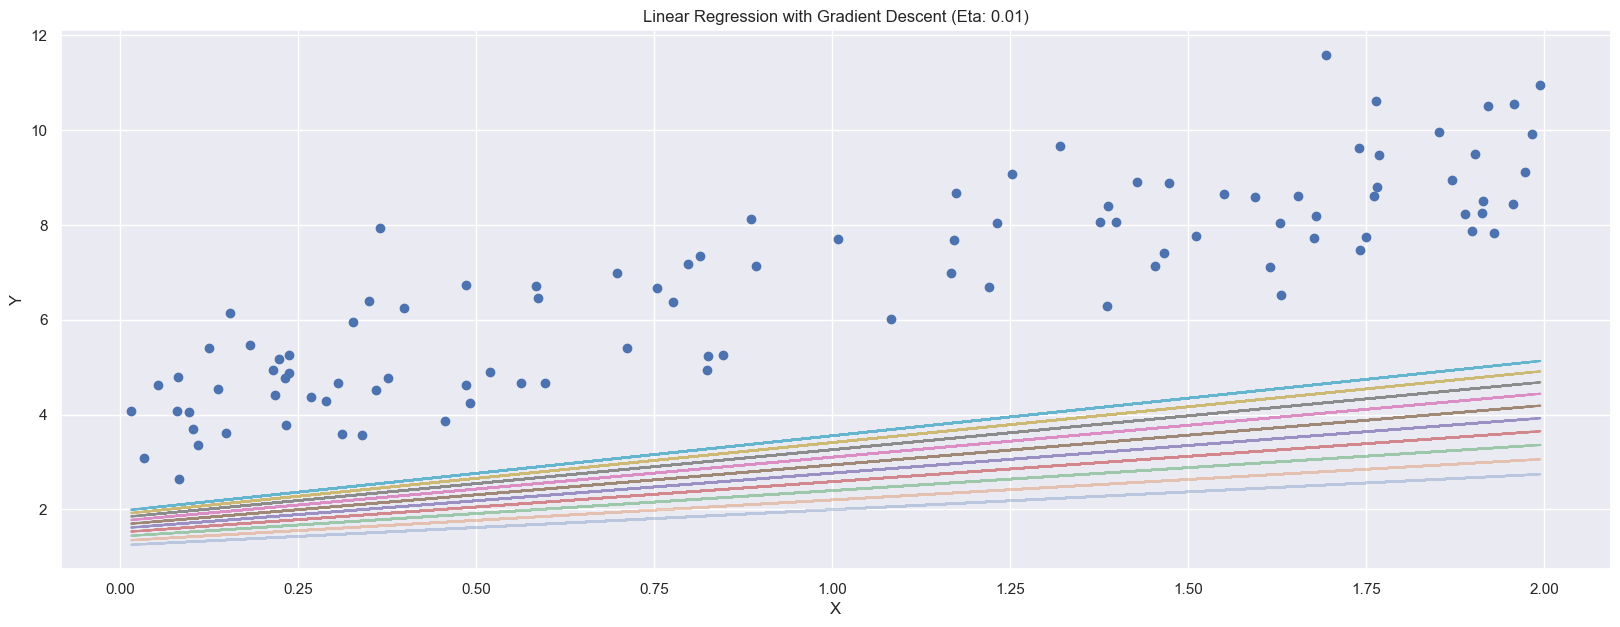

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are already defined as the input features and target variable

eta = 0.01  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)  # Random initialization

# Adding a bias term (x_0 = 1) to the input data (x) for the intercept term (theta[0])
x_b = np.c_[np.ones((m, 1)), x]

# Setting up the plot for visualization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    # Computing gradients using the mean squared error derivative formula
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    # Updating the theta parameters using gradient descent
    theta -= eta * gradients

    if iteration % 1 == 0:
        y_hat = x_b.dot(theta)
        # Normalize the iteration value to be between 0 and 1
        alpha_val = min(1.0, 0.3 + iteration / (n_iterations - 1))
        ax.plot(x, y_hat, alpha=alpha_val)

# Adding a title to the plot with the learning rate information
ax.set_title(f"Linear Regression with Gradient Descent (Eta: {eta})")

# Adding labels to the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Displaying the plot
plt.show()

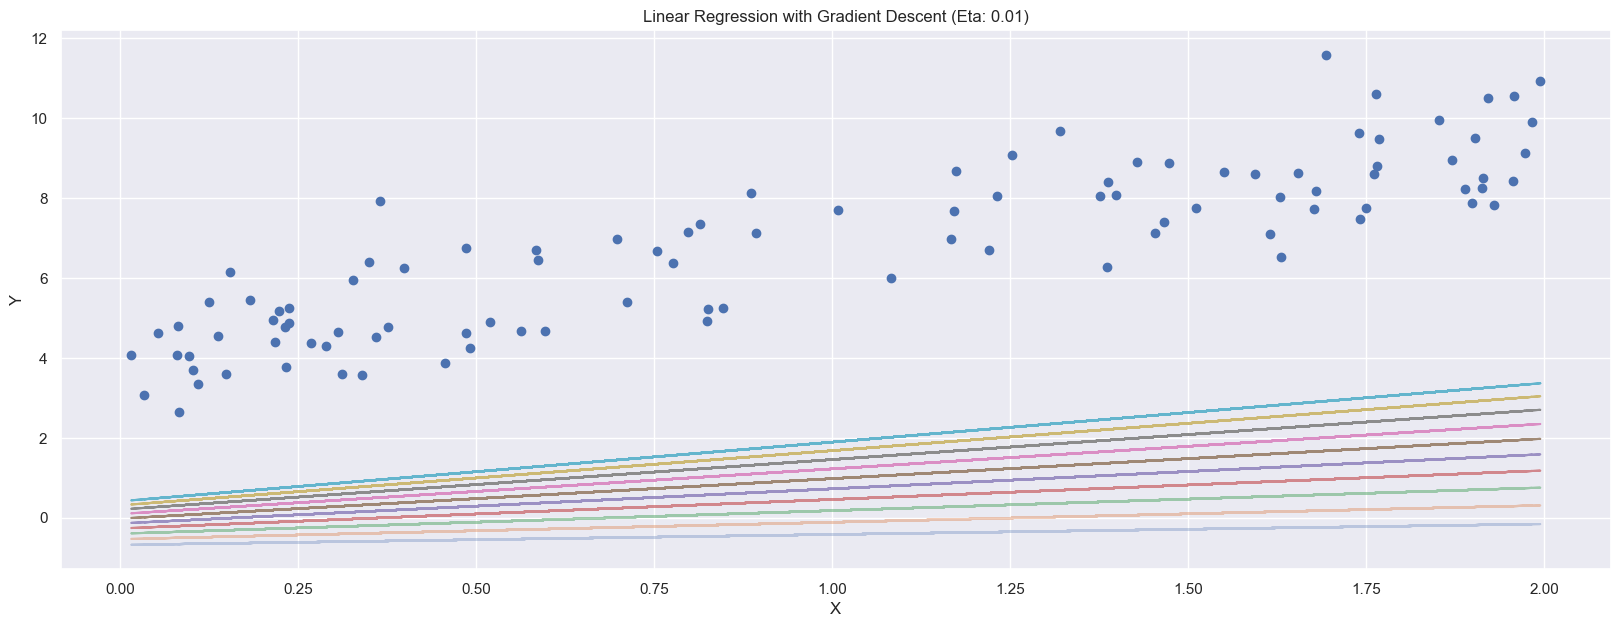

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming x and y are already defined as the input features and target variable

eta = 0.01  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)  # Random initialization

# Adding a bias term (x_0 = 1) to the input data (x) for the intercept term (theta[0])
x_b = np.c_[np.ones((m, 1)), x]

# Setting up the plot for visualization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    # Computing gradients using the mean squared error derivative formula
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    # Updating the theta parameters using gradient descent
    theta -= eta * gradients

    if iteration % 1 == 0:
        y_hat = x_b.dot(theta)
        # Normalize the iteration value to be between 0 and 1
        alpha_val = min(1.0, 0.3 + iteration / (n_iterations - 1))
        ax.plot(x, y_hat, alpha=alpha_val)

# Adding a title to the plot with the learning rate information
ax.set_title(f"Linear Regression with Gradient Descent (Eta: {eta})")

# Adding labels to the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Displaying the plot
plt.show()

### Polynomial Regression

__Polynomial Regression__ is a variation of linear regression used when the relationship between the input features (independent variables) and the target variable (dependent variable) is not linear but can be better approximated by a polynomial curve. Instead of fitting a straight line, polynomial regression fits a polynomial function to the data. This means it can capture more complex patterns and relationships between variables.

In polynomial regression, the input features are transformed by raising them to different powers, creating new polynomial features. For example, if we have a single feature x, in addition to using x, we can also use x^2, x^3, and so on. The degree of the polynomial determines how complex the model can be.

The process of fitting the polynomial function is similar to linear regression. The model finds the coefficients for each polynomial feature that best fits the data. Polynomial regression allows us to model and predict more intricate relationships in the data, but higher degrees of polynomial may also lead to overfitting the training data if not used carefully.

In [20]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

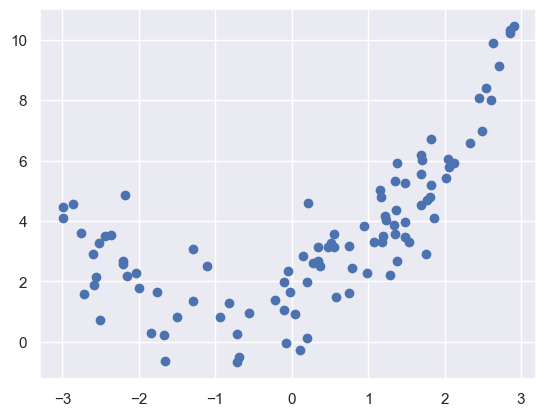

In [21]:
plt.scatter(x, y)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [23]:
x_poly[0]

array([-1.84349966,  3.39849099])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.51538516]), array([[1.05559829, 0.61831025]]))

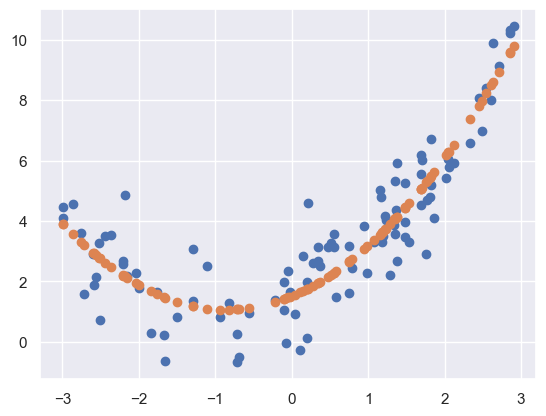

In [25]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly))

### What happens if the model complexity is increased unnecessarily?

(-4.0, 4.0)

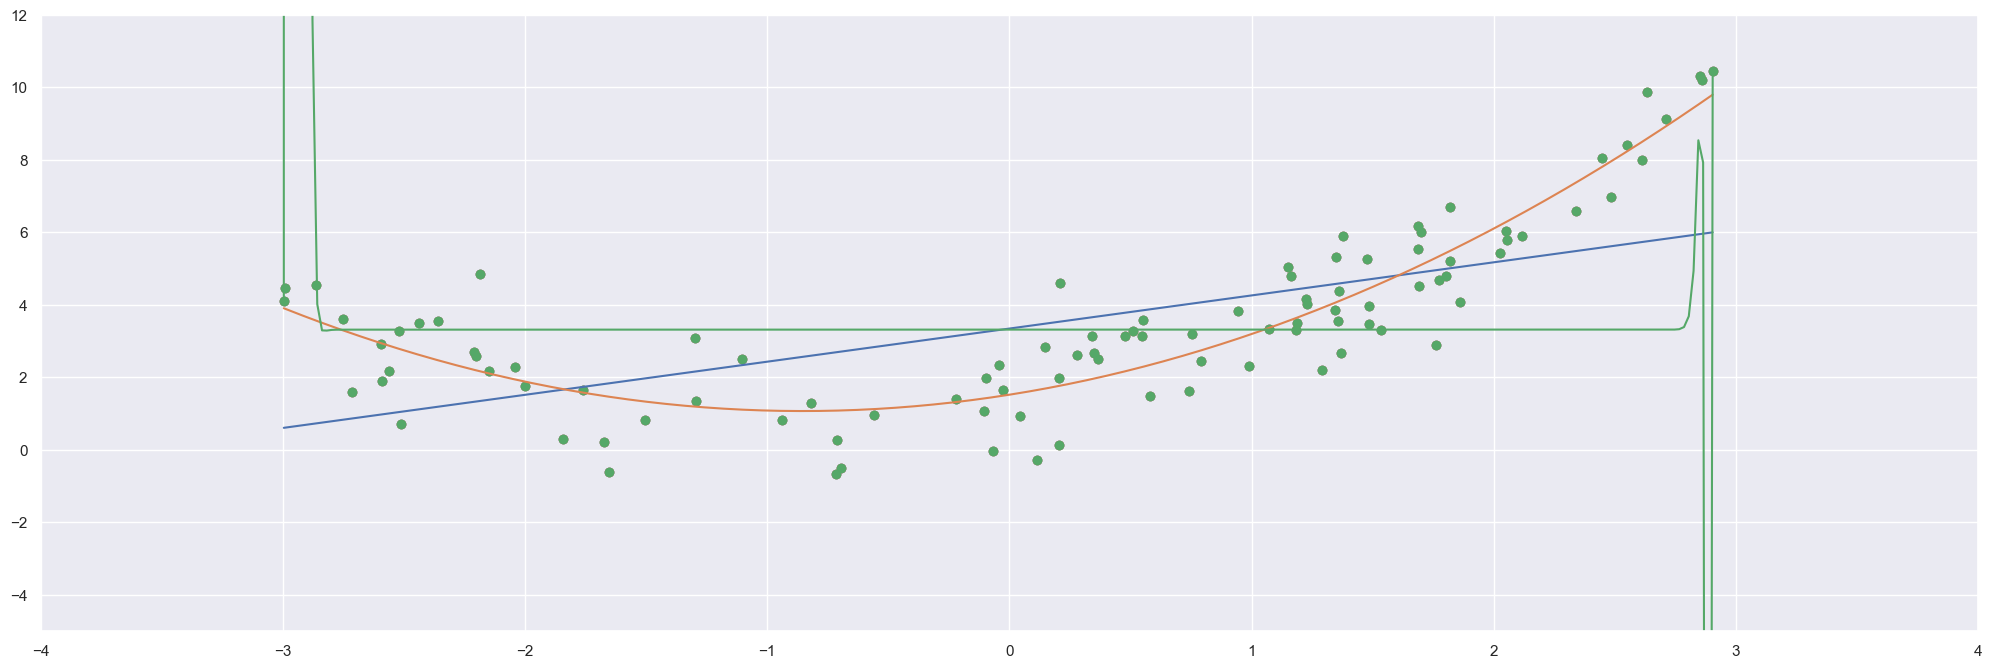

In [26]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

### Ridge Regression

__Ridge Regression__ is a regularization technique used in linear regression to prevent overfitting and improve the model's generalization ability. In traditional linear regression, the model tries to find the best-fitting line to the data by minimizing the sum of squared errors between the predicted values and the actual values. However, when the dataset has high multicollinearity (strong correlation between features), the model can become sensitive to small changes in the input data and may overfit.

Ridge Regression addresses this issue by adding a penalty term to the linear regression objective function. This penalty term is proportional to the squared magnitudes of the model's coefficients. By penalizing large coefficient values, Ridge Regression encourages the model to keep the coefficients small, which reduces the impact of individual features on the predictions and makes the model more robust.

The strength of the regularization (i.e., how much to penalize large coefficients) is controlled by a hyperparameter called the "alpha" parameter. A higher alpha value leads to stronger regularization, and a lower alpha value reduces the regularization effect, making the Ridge Regression approach more similar to standard linear regression.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

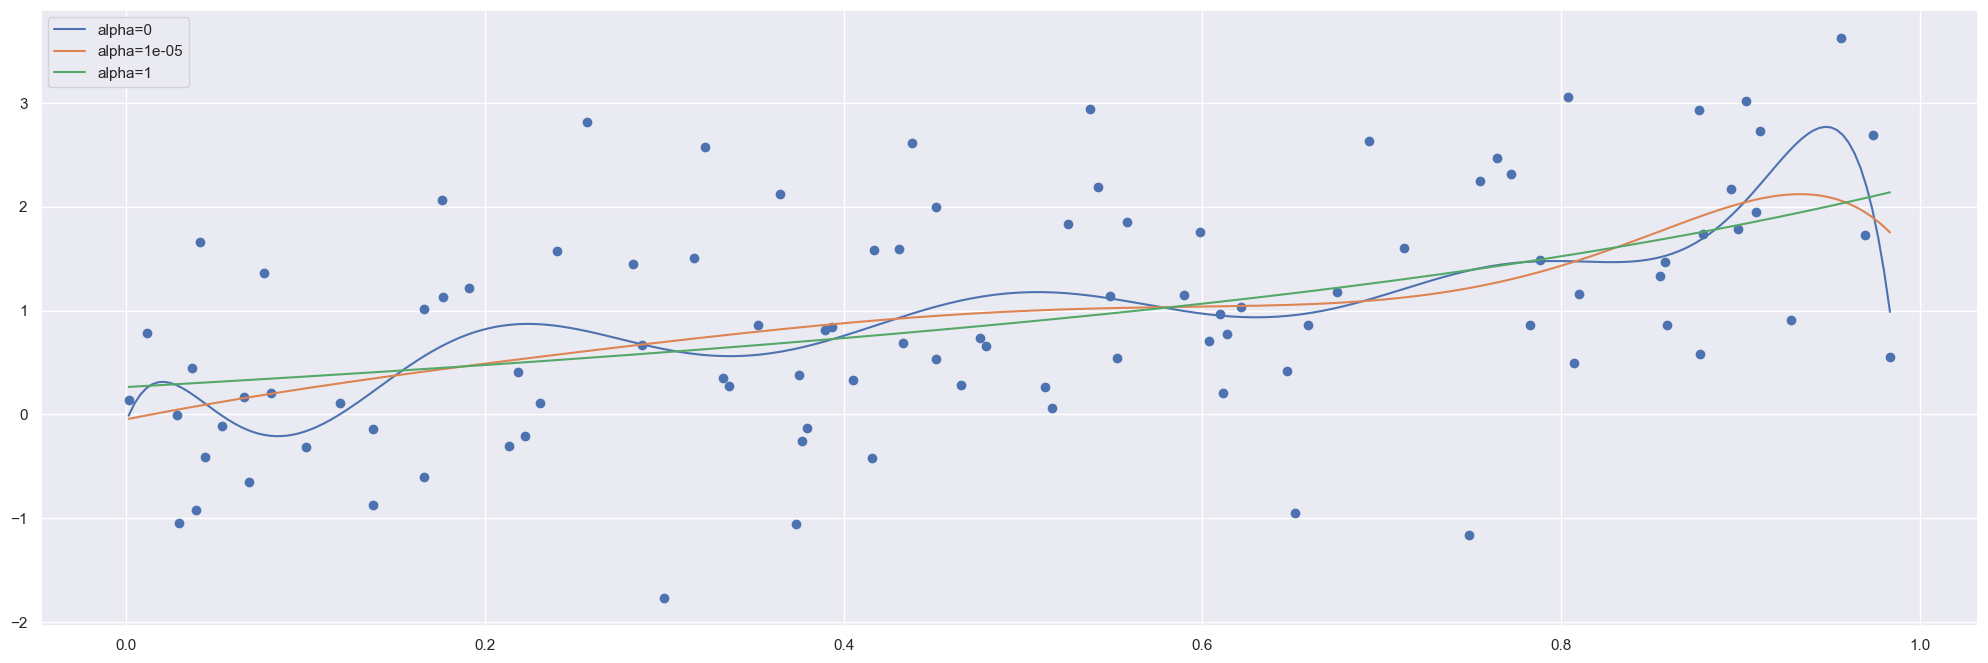

In [45]:
# Placeholder data (replace this with your actual data)
x = np.random.rand(100, 1)
y = 2 * x + np.random.randn(100, 1)

fig, ax = plt.subplots(figsize=(25, 8))
plt.scatter(x, y)

for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)

    x_seq_transf = poly_features.transform(x_seq)  # Use transform instead of fit_transform
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=f"alpha={alpha}")

ax.legend()
plt.show()

### Logistic Regression

__Logistic Regression__ is a classification algorithm that predicts binary outcomes by calculating probabilities and using a threshold for classification. Its ability to handle non-linear relationships makes it suitable for a wide range of applications, from medical diagnosis to sentiment analysis in natural language processing. While it is a simple and interpretable algorithm, its performance can be improved by regularization techniques like L1 or L2 regularization to prevent overfitting and enhance generalization on complex datasets.

In [46]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [49]:
# Petal width
x = iris["data"][:, 3:] 
y = (iris["target"] == 2).astype(int)

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

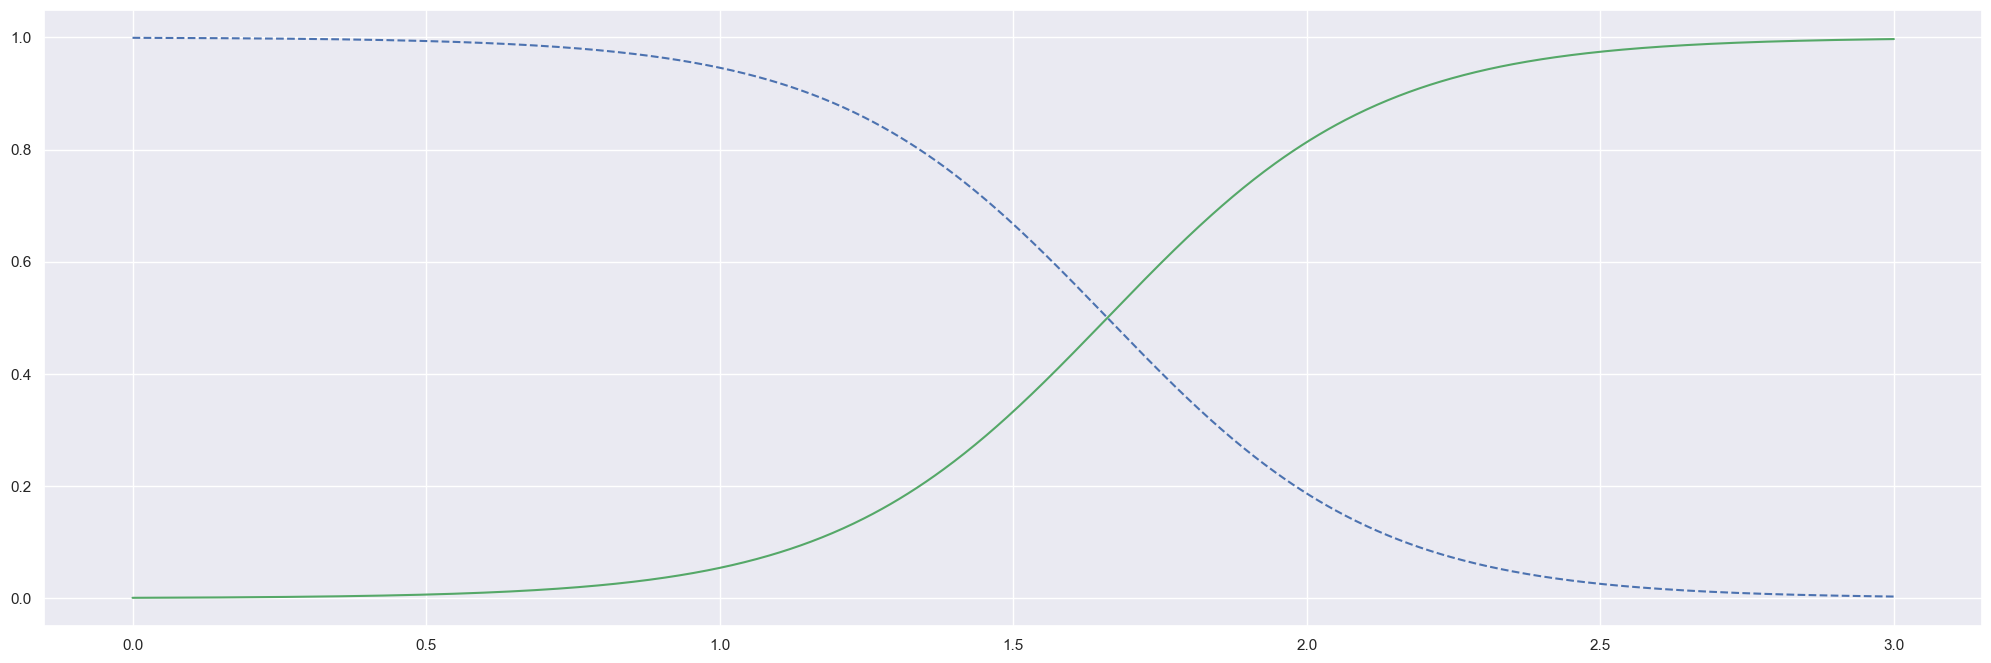

In [51]:
fig, ax = plt.subplots(figsize=(25, 8))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

### Softmax Regression

__Softmax Regression__ is commonly used in multiclass classification tasks such as image recognition, language modeling, and speech recognition. It is an extension of logistic regression, allowing us to handle multiple classes efficiently. Like logistic regression, the model learns the optimal parameters during the training process, which are then used to predict the class probabilities for new data points.

In [52]:
# Petal length, Petal width
x = iris["data"][:, (2, 3)]  
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [53]:
0.5 * np.log(1/0.5) + 0.5 * np.log(1/0.5)

0.6931471805599453

In [54]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

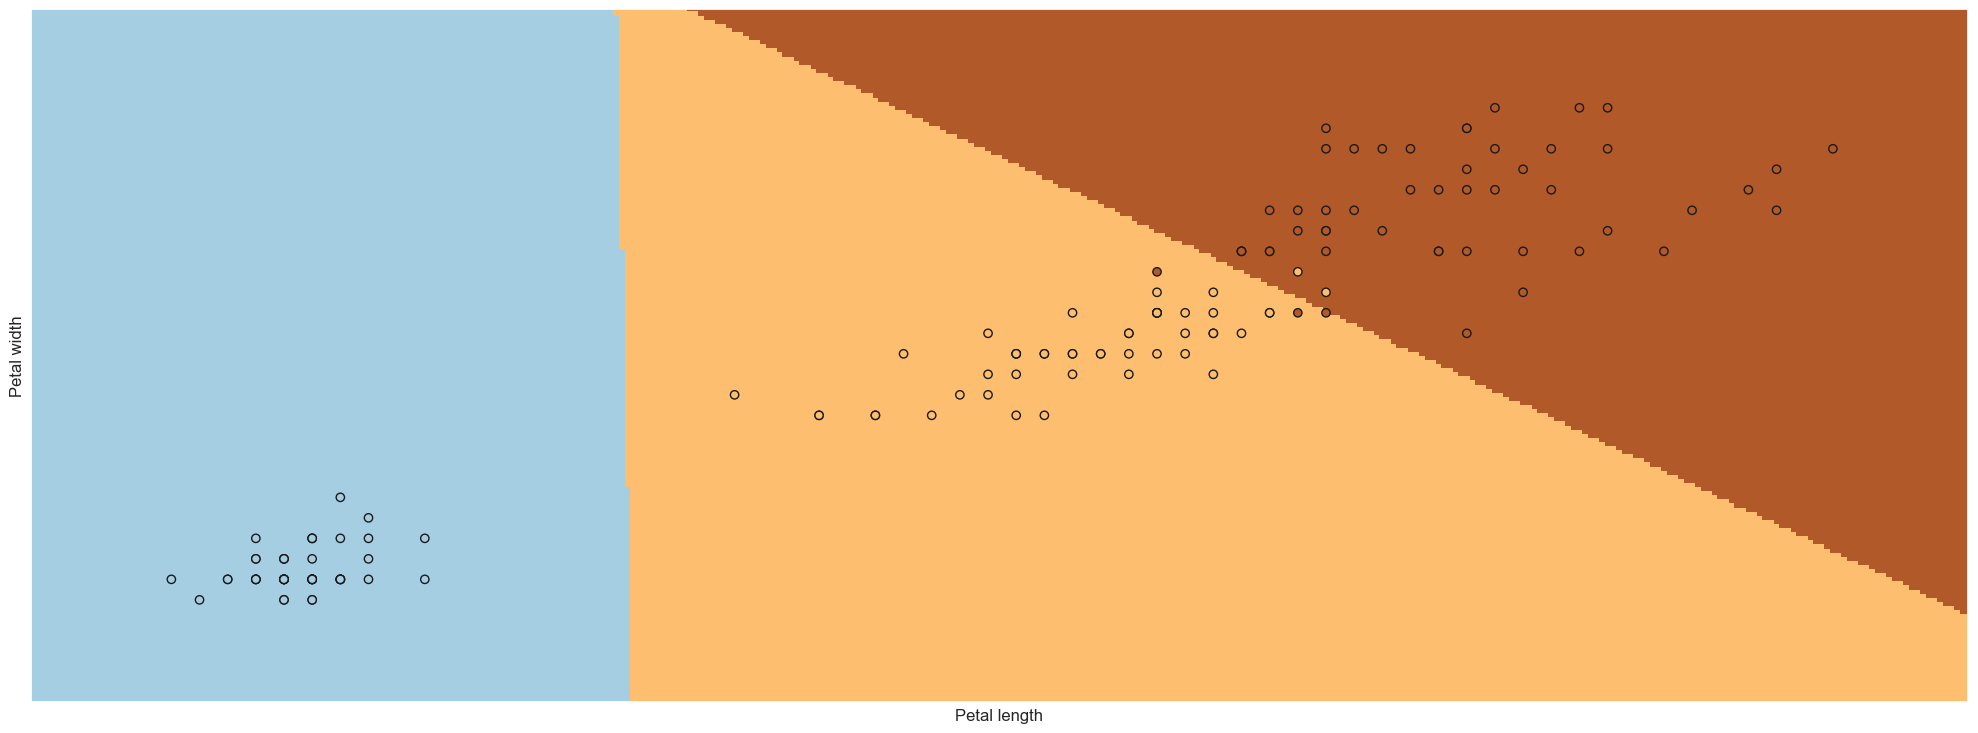

In [56]:
# Plot the decision boundary.
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)  # Fix 'Y' to 'y'
plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()